# SUMMARIZATION TECHNIQUES

## USE OF DATASETS WITH GROUND TRUTH FOR COMPARING THE DIFFERENT SUMMARIZATION TECHNIQUES

### FIRST DATASET - QMSUM WITH DISCUSSION ABOUT PRODUCTS

In [1]:
import json
import pandas as pd

# Load the JSON data
with open('datasets/QMSum/data/Product/train/ES2002c.json', 'r') as f:
    data = json.load(f)


print(data.keys())
df_topics = pd.DataFrame(data['topic_list'])
df_query_list = pd.DataFrame(data['general_query_list'])
df_comments = pd.DataFrame(data['meeting_transcripts'])
print('--------------------------------------------------------------------------------------------------------------------')
print(df_comments)
print('--------------------------------------------------------------------------------------------------------------------')
print(df_topics)

dict_keys(['topic_list', 'general_query_list', 'specific_query_list', 'meeting_transcripts'])
--------------------------------------------------------------------------------------------------------------------
                 speaker                                            content
0    Industrial Designer  'S to do now is to decide how to fulfil what y...
1              Marketing                                             Yeah .
2    Industrial Designer                      so in that sense {disfmarker}
3        Project Manager                                             Okay .
4              Marketing                                      Yeah , sure .
..                   ...                                                ...
635  Industrial Designer                                    Play-doh time .
636      Project Manager                      Yeah quite jealous actually .
637  Industrial Designer  You got to choose first . {vocalsound} No , we...
638            Marketing     

                speaker                                            content
0   Industrial Designer  'S to do now is to decide how to fulfil what y...
1             Marketing                                             Yeah .
2   Industrial Designer                      so in that sense {disfmarker}
3       Project Manager                                             Okay .
4             Marketing                                      Yeah , sure .
..                  ...                                                ...
87            Marketing  Anyway those are {disfmarker} that's all I have ,
88      Project Manager                                     That's great .
89            Marketing  but uh hopefully we can we can revisit those i...
90      Project Manager                              Uh-huh . Okay great .
91            Marketing                                              {gap}

[92 rows x 2 columns]


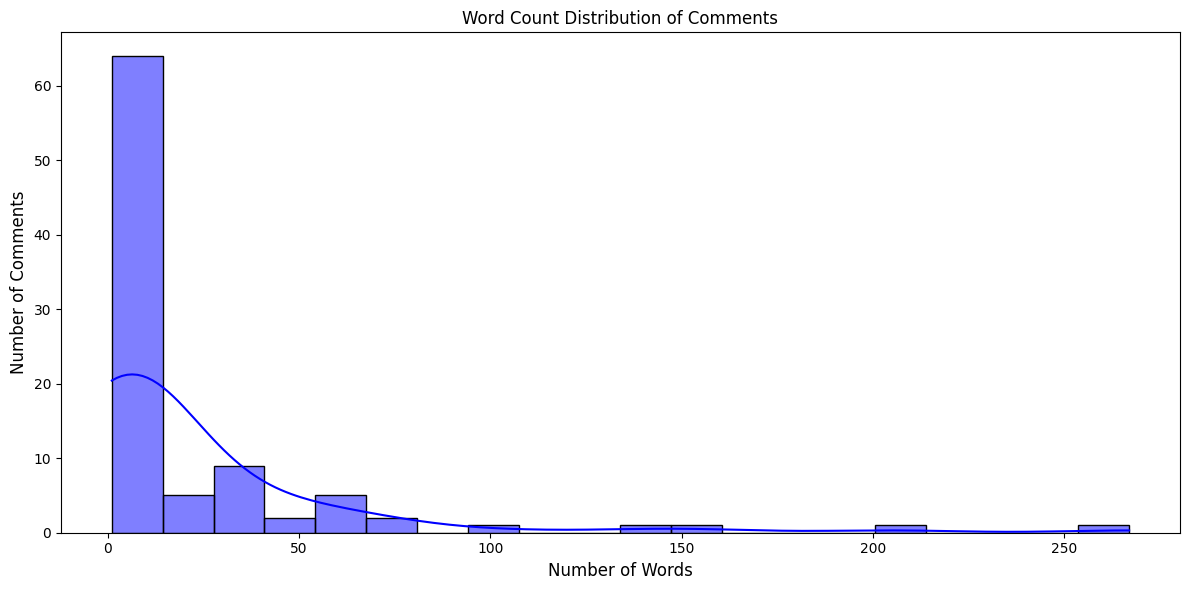

In [2]:
from utils.plot_words_distribution import plot_distribution_of_words

text_col = 'content'

# take the topic No2:  Presentation on the component design
df_sum_3 = df_comments[0:92]
df_sum_3 = df_sum_3.reset_index(drop=True)
print(df_sum_3)

# plot the distribution of words
plot_distribution_of_words(df_sum_3, text_col)

In [3]:
from utils.load_prompts import load_chosen_prompt
from summarization_methods.divide_comments_and_summarize import divide_comments_by_time, create_summary_for_groups_of_comments
from utils.load_pretrained_spacy_model import load_pretrained_model
from sklearn.model_selection import train_test_split

# load the final dataset and the language
df_sum_3, _ = load_pretrained_model(df=df_sum_3, text_col=text_col)

# load the prompt template
prompt_template = load_chosen_prompt(prompt_name='prompt_for_summarizing_multiple_comments')

The language of the dataset is: en
The number of arguments to contain in the prompt are: 4
The required arguments are: ['language', 'topic', 'previous_summaries', 'comments']


### 1ST SUMMARIZATION TECHNIQUE: SEPARATE COMMENTS RANDOMLY INTO GROUPS

We are going to implement a simple technique by grouping the comments/reviews into groups randomly, create a summary for each group of comments and finally a final summarization based on the summaries of group of comments

In [4]:
from summarization_methods.divide_comments_and_summarize import divide_comments_by_time, create_summary_for_groups_of_comments

language = 'English'
topic = df_topics.iloc[0].topic

# divide the comments into groups
groups_1 = divide_comments_by_time(df_sum_3, text_column='content')

#create the summaries
summaries_1 = create_summary_for_groups_of_comments(groups=groups_1, prompt=prompt_template, gpt_model='gpt-4o', language=language, topic=topic)

Comments do not contain timestamp. Continue the group by shuffle them.


  7%|█████████████▌                                                                                                                                                                                             | 1/15 [00:02<00:30,  2.15s/it]

The comments primarily focus on the impact of market trends on the overall project and the importance of integrating these insights into the planning process. One participant emphasises the significance of a particular market issue, implying that addressing this will affect the broader scope of their activities. Another highlights fashion trends, particularly the emerging theme of fruit and vegetables in European fashion, suggesting this as a priority. The speaker also mentions their approach to summarising extensive market research and identifying key trends that align with the project plan. They propose using these insights to guide design discussions, thereby refining the project elements. Finally, agreement and acknowledgment of points raised are noted, ensuring a collective understanding and strategy moving forward.


 13%|███████████████████████████                                                                                                                                                                                | 2/15 [00:03<00:22,  1.70s/it]

The comments discuss the importance of revisiting earlier ideas in future discussions, emphasizing the need to consider market trends while also integrating non-electronic elements such as home decor into the project. One participant points out the necessity of balancing innovation with practicality, highlighting the potential of high-tech products that appear seamless and buttonless. They stress the importance of creating innovative, user-friendly designs that light up or include unique features. The conversation underscores the need for careful and thoughtful integration of market trends and technological advancements into the project's development.


 20%|████████████████████████████████████████▌                                                                                                                                                                  | 3/15 [00:04<00:17,  1.44s/it]

The comments reflect a strong focus on consumer preferences for television remote controls, particularly emphasizing the importance of a fancy and appealing look and feel rather than purely functional design. One participant suggests potential enhancements like incorporating lights with different colors or offering interchangeable covers to cater to consumer desires for aesthetic customization. The discussion signifies a need to determine practical implementation steps to align with these consumer trends and preferences.


 27%|██████████████████████████████████████████████████████▏                                                                                                                                                    | 4/15 [00:06<00:15,  1.44s/it]

The comments centre around key decisions and creative approaches for the project. They outline the plan to use non-rechargeable battery power and categorize audio-visual and other functions accordingly. There are three new requirements: to ignore teletext, focus solely on TV functions, and incorporate corporate colors and slogans. Additionally, emphasis is placed on ensuring creativity and innovation without adding unnecessary elements, prioritizing ease of use, and maintaining a user-friendly design with advanced technology. There is a clear directive to focus on the innovation contributing to the product's aesthetics rather than merely its functionality.


 33%|███████████████████████████████████████████████████████████████████▋                                                                                                                                       | 5/15 [00:07<00:12,  1.25s/it]

The comments lack substantive feedback or distinct insights, consisting primarily of brief acknowledgments and affirmations without additional context or specific observations. As such, no new thematic topics or unique insights are discernible from these remarks to contribute to the broader discussion about market trends or to the project's development.


 40%|█████████████████████████████████████████████████████████████████████████████████▏                                                                                                                         | 6/15 [00:08<00:10,  1.19s/it]

The comments provided lack substantive feedback or distinct insights, consisting primarily of brief acknowledgments and affirmations without additional context or specific observations. As such, no new thematic topics or unique insights are discernible from these remarks to contribute to the broader discussion about market trends or to the project's development.


 47%|██████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                            | 7/15 [00:09<00:08,  1.12s/it]

The comments lack substantive feedback or distinct insights, consisting primarily of brief acknowledgments and affirmations without additional context or specific observations. As such, no new thematic topics or unique insights are discernible from these remarks to contribute to the broader discussion about market trends or to the project's development.


 53%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                              | 8/15 [00:10<00:07,  1.14s/it]

The comments primarily recapitulate logistical and procedural details from previous discussions, with participants affirming their readiness for the meeting and agreeing on the sense and structure of the meeting agenda. There is a brief reference to focusing on practical action and design decisions rather than background discussions as the meeting progresses. No new thematic topics or insights directly related to market trends are introduced in these brief exchanges.


 60%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                 | 9/15 [00:11<00:07,  1.30s/it]

The comments focus on finalizing key decisions regarding the project's objectives and concepts. The primary point of discussion is the determination of the target demographic, specified as individuals between 15 and 35 years old. There is also a brief mention of considering the incorporation of speech recognition technology, although a definitive decision has yet to be made. Additionally, there is an emphasis on the need to conclusively decide on the product concepts in this meeting. Overall, the comments highlight the process of solidifying project parameters and exploring potential technological integrations.


 67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                   | 10/15 [00:13<00:06,  1.35s/it]

The comments suggest a structured approach to discussing the presentations, proposing to save all discussions for the end to maintain a coherent flow. There are creative ideas focused on evolving the concept of a product, inspired by the Mac iPod, to incorporate more user-friendly and vibrant features. This involves considering various themes, shapes, materials, and colors to create a unified marketing identity. Suggestions include exploring themes like lemon and lime colors to evoke specific associations. Overall, the comments emphasize a thoughtful integration of design elements for a cohesive market presentation.


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                     | 11/15 [00:14<00:05,  1.26s/it]

The comments provided in this group lack substantive feedback or distinct insights, similar to previous groups. They consist mainly of brief affirmations, negative remarks, and idle chatter without additional context or specific observations. Consequently, no new thematic topics or unique insights are discernible from these remarks to contribute to the broader discussion about market trends or to the project's development.


 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                        | 12/15 [00:16<00:04,  1.39s/it]

The comments primarily revolve around logistical aspects and preparatory steps for the presentation on market trends, with an emphasis on presenting background information to ensure the success of the discussion. Additionally, there is a suggestion to incorporate engaging and somewhat gimmicky features, such as lighting elements in products, to enhance user experience. However, much of the feedback remains non-specific, predominantly consisting of brief affirmations and filler sounds without substantive insights or observations. This group mirrors earlier comments that focus more on process and minor creative ideas rather than introducing new thematic topics or significant insights about market trends.


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                           | 13/15 [00:18<00:03,  1.56s/it]

The comments reflect a recurring interest in assigning a thematic identity to the product, specifically with references to lemon and lime as visual motifs, inspired by their prevalence in other industries like websites, clothing, and furniture. There is an emphasis on ensuring the ease of use in innovations, indicating that this will be a crucial aspect of the product's appeal. However, discussions also contemplate whether to incorporate existing trends or distinctively diverge from them. Despite some moments of brief affirmations and idle remarks, the main insights focus on conceptualizing a unique market identity and enhancing user experience through thoughtful design and ease of use.


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 14/15 [00:20<00:01,  1.72s/it]

The comments reflect a recurring emphasis on the importance of material trends for the product, highlighting the preference for soft and spongy materials that are ergonomic and friendly to handle. This represents a shift from last year’s market trends, and capitalizing on this new trend is seen as advantageous against competitors still adhering to last year’s standards. There is a strong focus on style being the predominant factor for the target market, along with the necessity for innovative design technology to denote a cutting-edge image. Ease of use remains a crucial feature to be ensured in the design. Additionally, the use of vibrant natural colors is noted as significant, along with the consideration of softness in materials, shape, and function for the overall product concept. The Mac iPod is mentioned as a contextual reference, indicating a desire to innovate while maintaining user-friendliness and strong aesthetic appeal.


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [00:21<00:00,  1.41s/it]

The comments in this group lack substantive insights and are primarily composed of brief affirmations, filler sounds, and vague phrases. There are no new thematic topics or significant observations provided. As a result, these remarks do not contribute meaningfully to the ongoing discussion about market trends or the project's development.


In [5]:
# load the prompt template
prompt_template_final_1 = load_chosen_prompt(prompt_name='final_prompt_for_summarizing_multiple_summaries')

The number of arguments to contain in the prompt are: 2
The required arguments are: ['topic', 'summaries']


#### FINAL SUMMARY BASED ON SUMMARIES OF COMMENTS

In [6]:
from summarization_methods.divide_comments_and_summarize import final_summary_of_divided_comments
topic = df_topics.iloc[0].topic

#create the summaries
final_summary_1 = final_summary_of_divided_comments(prompt=prompt_template_final_1, gpt_model='gpt-4o', topic=topic, summaries=summaries_1)

The discussion on market trends centers on integrating key insights into project planning and design. Significant points include balancing innovation with practicality, emphasizing emerging trends like the fruit and vegetable motifs in European fashion, and exploring vibrant, user-friendly designs inspired by successful products like the Mac iPod. There is a recurring focus on creating ergonomically appealing products using materials like soft spongy textures, and ensuring functionality through practical and aesthetic enhancements, such as interchangeable covers and colorful lights for television remotes. The importance of aligning with consumer preferences and maintaining a unique market identity is underscored, with considerations of speech recognition technology and demographic targeting also being highlighted. Procedurally, logistical coordination and structured discussions were emphasized to foster cohesive strategic development.


### 2ND SUMMARIZATION TECHNIQUE: CLASSIFY COMMENTS BASED ON LABELS AND SUMMARY THE LABELS

We are going to implement more complicated technique, in which we are going to classify comments based on some labels that we are going to define. For each label for are going to create summaries and finally a final summary based on these summaries

In [7]:
from summarization_methods.classification_of_comments_and_summarization import classify_comments

df_sum_3 = classify_comments(df=df_sum_3, text_col='content', prompt_name='prompt_for_classification_QMSUM', gpt_model='gpt-4o')

  1%|██▏                                                                                                                                                                                                        | 1/92 [00:00<00:55,  1.65it/s]

'1'
Chosen label from GPT model is: 1


  2%|████▍                                                                                                                                                                                                      | 2/92 [00:01<00:49,  1.83it/s]

'1'
Chosen label from GPT model is: 1


  3%|██████▌                                                                                                                                                                                                    | 3/92 [00:01<00:46,  1.91it/s]

'1'
Chosen label from GPT model is: 1


  4%|████████▊                                                                                                                                                                                                  | 4/92 [00:02<00:48,  1.80it/s]

'1'
Chosen label from GPT model is: 1


  5%|███████████                                                                                                                                                                                                | 5/92 [00:02<00:47,  1.82it/s]

'1'
Chosen label from GPT model is: 1


  7%|█████████████▏                                                                                                                                                                                             | 6/92 [00:03<00:45,  1.89it/s]

1
Chosen label from GPT model is: 1


  8%|███████████████▍                                                                                                                                                                                           | 7/92 [00:03<00:45,  1.88it/s]

'1'
Chosen label from GPT model is: 1


  9%|█████████████████▋                                                                                                                                                                                         | 8/92 [00:04<00:43,  1.91it/s]

1
Chosen label from GPT model is: 1


 10%|███████████████████▊                                                                                                                                                                                       | 9/92 [00:04<00:44,  1.87it/s]

'1'
Chosen label from GPT model is: 1


 11%|█████████████████████▉                                                                                                                                                                                    | 10/92 [00:05<00:44,  1.86it/s]

'1'
Chosen label from GPT model is: 1


 12%|████████████████████████▏                                                                                                                                                                                 | 11/92 [00:05<00:44,  1.80it/s]

'2'
Chosen label from GPT model is: 2


 13%|██████████████████████████▎                                                                                                                                                                               | 12/92 [00:06<00:45,  1.74it/s]

1
Chosen label from GPT model is: 1


 14%|████████████████████████████▌                                                                                                                                                                             | 13/92 [00:07<00:45,  1.75it/s]

'1'
Chosen label from GPT model is: 1


 15%|██████████████████████████████▋                                                                                                                                                                           | 14/92 [00:07<00:43,  1.78it/s]

'1'
Chosen label from GPT model is: 1


 16%|████████████████████████████████▉                                                                                                                                                                         | 15/92 [00:08<00:42,  1.80it/s]

'1'
Chosen label from GPT model is: 1


 17%|███████████████████████████████████▏                                                                                                                                                                      | 16/92 [00:08<00:41,  1.83it/s]

'1'
Chosen label from GPT model is: 1


 18%|█████████████████████████████████████▎                                                                                                                                                                    | 17/92 [00:09<00:40,  1.85it/s]

'1'
Chosen label from GPT model is: 1


 20%|███████████████████████████████████████▌                                                                                                                                                                  | 18/92 [00:09<00:40,  1.83it/s]

'1'
Chosen label from GPT model is: 1


 21%|█████████████████████████████████████████▋                                                                                                                                                                | 19/92 [00:10<00:39,  1.84it/s]

'1'
Chosen label from GPT model is: 1


 22%|███████████████████████████████████████████▉                                                                                                                                                              | 20/92 [00:10<00:39,  1.83it/s]

'1'
Chosen label from GPT model is: 1


 23%|██████████████████████████████████████████████                                                                                                                                                            | 21/92 [00:11<00:38,  1.85it/s]

'2'
Chosen label from GPT model is: 2


 24%|████████████████████████████████████████████████▎                                                                                                                                                         | 22/92 [00:12<00:37,  1.86it/s]

'1'
Chosen label from GPT model is: 1


 25%|██████████████████████████████████████████████████▌                                                                                                                                                       | 23/92 [00:12<00:37,  1.84it/s]

'1'
Chosen label from GPT model is: 1


 26%|████████████████████████████████████████████████████▋                                                                                                                                                     | 24/92 [00:13<00:36,  1.86it/s]

1
Chosen label from GPT model is: 1


 27%|██████████████████████████████████████████████████████▉                                                                                                                                                   | 25/92 [00:13<00:36,  1.86it/s]

'1'
Chosen label from GPT model is: 1


 28%|█████████████████████████████████████████████████████████                                                                                                                                                 | 26/92 [00:14<00:35,  1.86it/s]

'1'
Chosen label from GPT model is: 1


 29%|███████████████████████████████████████████████████████████▎                                                                                                                                              | 27/92 [00:14<00:34,  1.88it/s]

'1'
Chosen label from GPT model is: 1


 30%|█████████████████████████████████████████████████████████████▍                                                                                                                                            | 28/92 [00:15<00:33,  1.90it/s]

'1'
Chosen label from GPT model is: 1


 32%|███████████████████████████████████████████████████████████████▋                                                                                                                                          | 29/92 [00:15<00:33,  1.86it/s]

'1'
Chosen label from GPT model is: 1


 33%|█████████████████████████████████████████████████████████████████▊                                                                                                                                        | 30/92 [00:16<00:35,  1.77it/s]

'1'
Chosen label from GPT model is: 1


 34%|████████████████████████████████████████████████████████████████████                                                                                                                                      | 31/92 [00:16<00:33,  1.81it/s]

'1'
Chosen label from GPT model is: 1


 35%|██████████████████████████████████████████████████████████████████████▎                                                                                                                                   | 32/92 [00:17<00:32,  1.87it/s]

0
Chosen label from GPT model is: 0


 36%|████████████████████████████████████████████████████████████████████████▍                                                                                                                                 | 33/92 [00:17<00:32,  1.82it/s]

'1'
Chosen label from GPT model is: 1


 37%|██████████████████████████████████████████████████████████████████████████▋                                                                                                                               | 34/92 [00:18<00:31,  1.84it/s]

'2'
Chosen label from GPT model is: 2


 38%|████████████████████████████████████████████████████████████████████████████▊                                                                                                                             | 35/92 [00:19<00:30,  1.88it/s]

'1'
Chosen label from GPT model is: 1


 39%|███████████████████████████████████████████████████████████████████████████████                                                                                                                           | 36/92 [00:19<00:29,  1.89it/s]

'1'
Chosen label from GPT model is: 1


 40%|█████████████████████████████████████████████████████████████████████████████████▏                                                                                                                        | 37/92 [00:20<00:28,  1.90it/s]

'1'
Chosen label from GPT model is: 1


 41%|███████████████████████████████████████████████████████████████████████████████████▍                                                                                                                      | 38/92 [00:20<00:28,  1.91it/s]

'1'
Chosen label from GPT model is: 1


 42%|█████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                    | 39/92 [00:21<00:27,  1.95it/s]

1
Chosen label from GPT model is: 1


 43%|███████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                  | 40/92 [00:21<00:31,  1.63it/s]

'1'
Chosen label from GPT model is: 1


 45%|██████████████████████████████████████████████████████████████████████████████████████████                                                                                                                | 41/92 [00:22<00:29,  1.72it/s]

1
Chosen label from GPT model is: 1


 46%|████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                             | 42/92 [00:22<00:27,  1.80it/s]

0
Chosen label from GPT model is: 0


 47%|██████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                           | 43/92 [00:23<00:26,  1.83it/s]

'1'
Chosen label from GPT model is: 1


 48%|████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                         | 44/92 [00:24<00:26,  1.79it/s]

'1'
Chosen label from GPT model is: 1


 49%|██████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                       | 45/92 [00:24<00:27,  1.74it/s]

'2'
Chosen label from GPT model is: 2


 50%|█████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                     | 46/92 [00:25<00:26,  1.70it/s]

'2'
Chosen label from GPT model is: 2


 51%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                  | 47/92 [00:25<00:25,  1.75it/s]

'1'
Chosen label from GPT model is: 1


 52%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                | 48/92 [00:26<00:24,  1.79it/s]

1
Chosen label from GPT model is: 1


 53%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                              | 49/92 [00:26<00:25,  1.70it/s]

1
Chosen label from GPT model is: 1


 54%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                            | 50/92 [00:27<00:23,  1.77it/s]

1
Chosen label from GPT model is: 1


 55%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                          | 51/92 [00:28<00:23,  1.77it/s]

'1'
Chosen label from GPT model is: 1


 57%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                       | 52/92 [00:28<00:22,  1.79it/s]

1
Chosen label from GPT model is: 1


 58%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                     | 53/92 [00:29<00:21,  1.81it/s]

'1'
Chosen label from GPT model is: 1


 59%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                   | 54/92 [00:29<00:20,  1.81it/s]

'1'
Chosen label from GPT model is: 1


 60%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                 | 55/92 [00:30<00:20,  1.84it/s]

'1'
Chosen label from GPT model is: 1


 61%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                               | 56/92 [00:30<00:19,  1.88it/s]

'0'
Chosen label from GPT model is: 0


 62%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                            | 57/92 [00:31<00:18,  1.85it/s]

'1'
Chosen label from GPT model is: 1


 63%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                          | 58/92 [00:31<00:18,  1.86it/s]

'1'
Chosen label from GPT model is: 1


 64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                        | 59/92 [00:32<00:18,  1.79it/s]

'1'
Chosen label from GPT model is: 1


 65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                      | 60/92 [00:32<00:17,  1.81it/s]

'2'
Chosen label from GPT model is: 2


 66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                    | 61/92 [00:33<00:16,  1.84it/s]

'0'
Chosen label from GPT model is: 0


 67%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                 | 62/92 [00:33<00:16,  1.87it/s]

'1'
Chosen label from GPT model is: 1


 68%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                               | 63/92 [00:34<00:15,  1.89it/s]

'1'
Chosen label from GPT model is: 1


 70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                             | 64/92 [00:35<00:18,  1.49it/s]

1
Chosen label from GPT model is: 1


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                           | 65/92 [00:36<00:17,  1.58it/s]

'1'
Chosen label from GPT model is: 1


 72%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                         | 66/92 [00:36<00:15,  1.65it/s]

'1'
Chosen label from GPT model is: 1


 73%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                       | 67/92 [00:37<00:14,  1.73it/s]

'2'
Chosen label from GPT model is: 2


 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                    | 68/92 [00:37<00:13,  1.80it/s]

'1'
Chosen label from GPT model is: 1


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                  | 69/92 [00:38<00:12,  1.83it/s]

'1'
Chosen label from GPT model is: 1


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                | 70/92 [00:38<00:12,  1.83it/s]

'1'
Chosen label from GPT model is: 1


 77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                              | 71/92 [00:39<00:11,  1.86it/s]

'1'
Chosen label from GPT model is: 1


 78%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                            | 72/92 [00:39<00:10,  1.86it/s]

'2'
Chosen label from GPT model is: 2


 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                         | 73/92 [00:40<00:10,  1.81it/s]

'2'
Chosen label from GPT model is: 2


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                       | 74/92 [00:40<00:09,  1.85it/s]

'1'
Chosen label from GPT model is: 1


 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                     | 75/92 [00:41<00:09,  1.85it/s]

'1'
Chosen label from GPT model is: 1


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 76/92 [00:41<00:08,  1.86it/s]

'1'
Chosen label from GPT model is: 1


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                 | 77/92 [00:42<00:09,  1.58it/s]

'0'
Chosen label from GPT model is: 0


 85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                              | 78/92 [00:43<00:08,  1.65it/s]

'1'
Chosen label from GPT model is: 1


 86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                            | 79/92 [00:43<00:07,  1.74it/s]

0
Chosen label from GPT model is: 0


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                          | 80/92 [00:44<00:06,  1.75it/s]

'1'
Chosen label from GPT model is: 1


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                        | 81/92 [00:44<00:06,  1.71it/s]

'1'
Chosen label from GPT model is: 1


 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                      | 82/92 [00:45<00:05,  1.71it/s]

'1'
Chosen label from GPT model is: 1


 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                   | 83/92 [00:46<00:05,  1.75it/s]

'1'
Chosen label from GPT model is: 1


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 84/92 [00:46<00:04,  1.77it/s]

'1'
Chosen label from GPT model is: 1


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋               | 85/92 [00:47<00:03,  1.79it/s]

'1'
Chosen label from GPT model is: 1


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊             | 86/92 [00:47<00:03,  1.81it/s]

'1'
Chosen label from GPT model is: 1


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████           | 87/92 [00:48<00:02,  1.83it/s]

'1'
Chosen label from GPT model is: 1


 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 88/92 [00:48<00:02,  1.87it/s]

1
Chosen label from GPT model is: 1


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍      | 89/92 [00:49<00:01,  1.91it/s]

0
Chosen label from GPT model is: 0


 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 90/92 [00:49<00:01,  1.87it/s]

'1'
Chosen label from GPT model is: 1


 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 91/92 [00:50<00:00,  1.89it/s]

'0'
Chosen label from GPT model is: 0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 92/92 [00:50<00:00,  1.81it/s]

'1'
Chosen label from GPT model is: 1


In [8]:
from utils.load_prompts import load_chosen_prompt

# load the prompt template for summarizing comments grouped by label
prompt_template_2 = load_chosen_prompt(prompt_name='prompt_for_summarizing_multiple_comments')

The number of arguments to contain in the prompt are: 4
The required arguments are: ['language', 'topic', 'previous_summaries', 'comments']


In [9]:
from summarization_methods.classification_of_comments_and_summarization import summarize_comments_by_label

text_col = 'content'
language = 'English'
topic = df_topics.iloc[0].topic

# produce the summaries for grouped comments by label
summaries_2 = summarize_comments_by_label(df=df_sum_3, text_col=text_col, prompt_name=prompt_template_2, gpt_model='gpt-4o', language=language, topic=topic)
print('-----------------------------------------------------------------------------------------------------------------------------------------------------')
# load the prompt template for the final summary
prompt_template_final_2 = load_chosen_prompt(prompt_name='final_prompt_for_summarizing_multiple_summaries')

The comments in the discussion on market trends center around several key themes. Participants expressed the need for actionable strategies to implement the identified trends, emphasizing practical steps for execution. There was a consensus on the importance of clarity in the application of these market insights. Some comments touched on potential gaps in the current understanding and suggested revisiting specific points for further analysis. Overall, the discussion highlighted a collaborative approach to building on existing ideas, with a focus on actionable outcomes and continual reassessment of the market trends presented.
The comments on the presentation of market trends are relatively brief and do not offer substantial content or insights directly related to the topic of discussion. They contain minimal actionable feedback or any distinct thematic elements that add to the previous summaries. Most of the comments consist of vocal expressions and non-specific remarks, which do not c

In [10]:
from summarization_methods.classification_of_comments_and_summarization import final_summary_of_labeled_comments

# produce the final summary for the 2nd technique
final_summary_2 = final_summary_of_labeled_comments(prompt=prompt_template_final_2, gpt_model='gpt-4o', topic=topic, summaries=summaries_2)

The discussion on the presentation of market trends generally centered around the necessity for actionable strategies and practical steps for implementation. Participants underscored the importance of clear application of market insights and highlighted the need for continual reassessment and analysis to address potential gaps in understanding. While there was a collaborative approach to building on existing ideas, there was also a noticeable lack of depth in later comments, which primarily consisted of affirmations and non-specific feedback without much practical or detailed analysis. Overall, the discussion pointed to a constructive yet evolving dialogue aimed at deriving actionable outcomes from the market trends presented.


### 3RD SUMMARIZATION TECHNIQUE: CLUSTER COMMENTS AND SUMMARY THE CLUSTERS

We are going to implement our 3rd technique. Initially, we are going to cluster the comments with our best performing clustering technique, and for each cluster we are going to make a summary. Finally, based on these summaries we are going to create a final summary. 

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 92/92 [00:31<00:00,  2.88it/s]


Using PCA to transformed embeddings


 35%|██████████████████████████████████████████████████████████████████████                                                                                                                                    | 17/49 [00:01<00:02, 14.88it/s]


The product of size_min and n_clusters cannot exceed the number of samples.
Terminating the calculation...
The optimum kappa based on Penalized Silhouette score is: 12


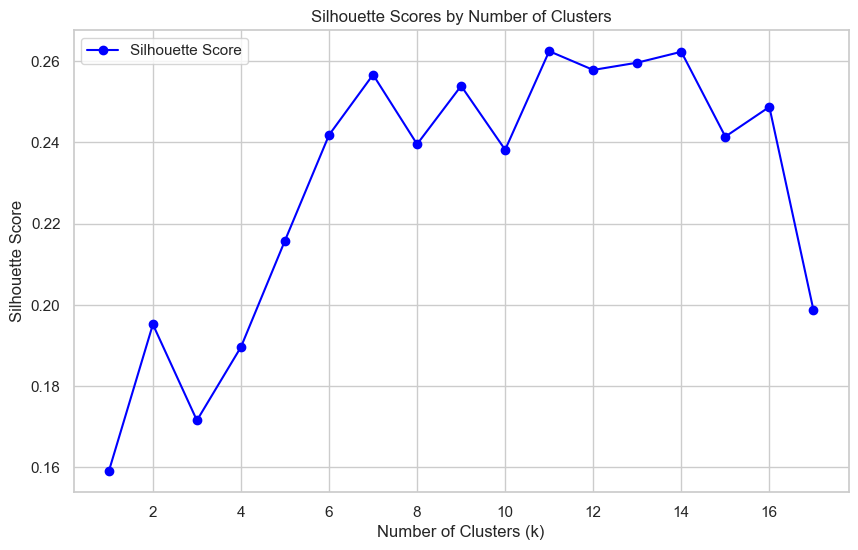

Silhouette score for best kappa: 0.300


In [11]:
from summarization_methods.topic_extraction_clustering_and_summarization import calc_clusters_with_kmeans

text_col='content'

# calculate the optimun kappa with KMeans via Silhouette score and using OPENAI embeddings ADA-002
df_sum_3, kmeans_results = calc_clusters_with_kmeans(df=df_sum_3, text_col=text_col, max_token_length=1000, is_pca=(True, 16))

In [12]:
from utils.load_prompts import load_chosen_prompt

# load the prompt template for summarizing comments grouped by label
prompt_template_3 = load_chosen_prompt(prompt_name='prompt_for_summarizing_multiple_comments')

The number of arguments to contain in the prompt are: 4
The required arguments are: ['language', 'topic', 'previous_summaries', 'comments']


In [13]:
from summarization_methods.topic_extraction_clustering_and_summarization import summarize_comments_by_cluster

text_col = 'content'
language = 'English'
topic = df_topics.iloc[0].topic

# produce the summaries for grouped comments by label
summaries_3 =summarize_comments_by_cluster(df=df_sum_3, text_col=text_col, prompt_name=prompt_template_3, gpt_model='gpt-4o', language=language, topic=topic)
print('-----------------------------------------------------------------------------------------------------------------------------------------------------')
# load the prompt template for the final summary
prompt_template_final_3 = load_chosen_prompt(prompt_name='final_prompt_for_summarizing_multiple_summaries')

Summary for cluster label: 10
The discussion on the presentation of market trends centers on several key aspects. Initial comments reflect on the decision-making process for fulfilling presentation requirements, highlighting a non-rechargeable approach. Suggestions include starting the presentation with Andrew, followed by a structured breakdown of topics. Important methodological considerations for data analysis are discussed, emphasizing clarity in the presentation’s approach. Comments also underscore the importance of revisiting and addressing any impacts on related market insights. Overall, the conversation focuses on effective structuring of the presentation, methodological transparency, and ensuring comprehensive coverage of market trends.
-------------------------------------------------------------------------------------
Summary for cluster label: 4
The comments reflect uniform agreement without introducing new topics or insights. All comments consist solely of brief affirmati

In [14]:
from summarization_methods.topic_extraction_clustering_and_summarization import final_summary_of_clustered_comments

# produce the final summary for the 3rd technique
final_summary_3 = final_summary_of_clustered_comments(prompt=prompt_template_final_3, gpt_model='gpt-4o', topic=topic, summaries=summaries_3)

The discussion on the presentation of market trends primarily focused on effective structuring, methodological transparency, and comprehensive coverage of market trends. Initial comments emphasized the decision-making process and the non-rechargeable approach taken. There was consensus on the presentation flow and data analysis methods. However, contributions predominantly consisted of brief affirmations, fragmented thoughts, and acknowledgments, indicating readiness to proceed and minimal introduction of new substantive topics. Insights touching on thematic elements like financial figures, product handling examples, market-specific trends in clothing and furniture, and technological integration highlighted some challenges and strategies for improvement. Overall, the conversation reflected a blend of structural planning, minor confirmations, and insightful yet fragmented discussions on market trends.


### 4TH SUMMARIZATION TECHNIQUE: TOPICS EXTRACTION OF COMMENTS, CLUSTER TOPICS AND SUMMARY THE CLUSTERS

We are going to implement our final technique in which we hope to be the best. Initially, we are going to extract topics for each comment/review. Moreover, we are going to cluster them with our best performing clustering technique, and for each cluster we are going to make a summary. Finally, based on these summaries we are going to create a final summary. 

In [15]:
from utils.load_prompts import load_chosen_prompt

# load the prompt template for summarizing comments grouped by label
prompt_template_topics = load_chosen_prompt(prompt_name='prompt_for_topic_extraction')

The number of arguments to contain in the prompt are: 4
The required arguments are: ['topic', 'language', 'topics', 'comment']


In [16]:
from summarization_methods.topic_extraction_clustering_and_summarization import topic_extraction

topic = df_topics.iloc[0].topic
language = 'English'

# extract topics using llm's (openai gpt-4o)
df_sum_3, df_topics_3 = topic_extraction(df=df_sum_3, text_col='content', prompt_template=prompt_template_topics, gpt_model='gpt-4o', topic=topic, language=language)

print('--------------------------------------------------------------------------------------------------------------------------------')
print(f'The length of the topics that produced are: {len(df_topics_3)}')
print(f'The columns of the new dataframe are: {df_topics_3.columns}')

  1%|██▏                                                                                                                                                                                                        | 1/92 [00:00<00:54,  1.68it/s]

extracted topics: []


  2%|████▍                                                                                                                                                                                                      | 2/92 [00:01<00:43,  2.05it/s]

extracted topics: []


  3%|██████▌                                                                                                                                                                                                    | 3/92 [00:01<00:40,  2.18it/s]

extracted topics: []


  4%|████████▊                                                                                                                                                                                                  | 4/92 [00:01<00:38,  2.27it/s]

extracted topics: []


  5%|███████████                                                                                                                                                                                                | 5/92 [00:02<00:36,  2.36it/s]

extracted topics: []


  7%|█████████████▏                                                                                                                                                                                             | 6/92 [00:02<00:36,  2.38it/s]

extracted topics: []


  8%|███████████████▍                                                                                                                                                                                           | 7/92 [00:03<00:47,  1.81it/s]

extracted topics: []


  9%|█████████████████▋                                                                                                                                                                                         | 8/92 [00:03<00:44,  1.91it/s]

extracted topics: ['meeting conclusion', 'action items', 'design focus']


 10%|███████████████████▊                                                                                                                                                                                       | 9/92 [00:04<00:40,  2.06it/s]

extracted topics: []


 11%|█████████████████████▉                                                                                                                                                                                    | 10/92 [00:05<00:48,  1.70it/s]

extracted topics: []


 12%|████████████████████████▏                                                                                                                                                                                 | 11/92 [00:05<00:42,  1.91it/s]

extracted topics: []


 13%|██████████████████████████▎                                                                                                                                                                               | 12/92 [00:05<00:38,  2.05it/s]

extracted topics: []


 14%|████████████████████████████▌                                                                                                                                                                             | 13/92 [00:06<00:36,  2.15it/s]

extracted topics: []


 15%|██████████████████████████████▋                                                                                                                                                                           | 14/92 [00:06<00:35,  2.19it/s]

extracted topics: ['meeting conclusion', 'action items']


 16%|████████████████████████████████▉                                                                                                                                                                         | 15/92 [00:07<00:35,  2.14it/s]

extracted topics: []


 17%|███████████████████████████████████▏                                                                                                                                                                      | 16/92 [00:07<00:34,  2.19it/s]

extracted topics: []


 18%|█████████████████████████████████████▎                                                                                                                                                                    | 17/92 [00:08<00:33,  2.26it/s]

extracted topics: []


 20%|███████████████████████████████████████▌                                                                                                                                                                  | 18/92 [00:08<00:33,  2.20it/s]

extracted topics: ['meeting conclusion', 'action items', 'design focus']


 21%|█████████████████████████████████████████▋                                                                                                                                                                | 19/92 [00:09<00:32,  2.26it/s]

extracted topics: []


 22%|███████████████████████████████████████████▉                                                                                                                                                              | 20/92 [00:09<00:31,  2.30it/s]

extracted topics: []


 23%|██████████████████████████████████████████████                                                                                                                                                            | 21/92 [00:09<00:31,  2.28it/s]

extracted topics: []


 24%|████████████████████████████████████████████████▎                                                                                                                                                         | 22/92 [00:10<00:30,  2.27it/s]

extracted topics: []


 25%|██████████████████████████████████████████████████▌                                                                                                                                                       | 23/92 [00:10<00:29,  2.33it/s]

extracted topics: []


 26%|████████████████████████████████████████████████████▋                                                                                                                                                     | 24/92 [00:11<00:31,  2.19it/s]

extracted topics: ['meeting conclusion', 'action items']


 27%|██████████████████████████████████████████████████████▉                                                                                                                                                   | 25/92 [00:11<00:31,  2.14it/s]

extracted topics: []


 28%|█████████████████████████████████████████████████████████                                                                                                                                                 | 26/92 [00:12<00:29,  2.23it/s]

extracted topics: []


 29%|███████████████████████████████████████████████████████████▎                                                                                                                                              | 27/92 [00:12<00:28,  2.31it/s]

extracted topics: []


 30%|█████████████████████████████████████████████████████████████▍                                                                                                                                            | 28/92 [00:12<00:27,  2.35it/s]

extracted topics: []


 32%|███████████████████████████████████████████████████████████████▋                                                                                                                                          | 29/92 [00:13<00:26,  2.34it/s]

extracted topics: []


 33%|█████████████████████████████████████████████████████████████████▊                                                                                                                                        | 30/92 [00:13<00:25,  2.39it/s]

extracted topics: []


 34%|████████████████████████████████████████████████████████████████████                                                                                                                                      | 31/92 [00:14<00:24,  2.44it/s]

extracted topics: []


 35%|██████████████████████████████████████████████████████████████████████▎                                                                                                                                   | 32/92 [00:14<00:24,  2.48it/s]

extracted topics: []


 36%|████████████████████████████████████████████████████████████████████████▍                                                                                                                                 | 33/92 [00:14<00:23,  2.48it/s]

extracted topics: []


 37%|██████████████████████████████████████████████████████████████████████████▋                                                                                                                               | 34/92 [00:15<00:23,  2.51it/s]

extracted topics: []


 38%|████████████████████████████████████████████████████████████████████████████▊                                                                                                                             | 35/92 [00:16<00:29,  1.95it/s]

extracted topics: []


 39%|███████████████████████████████████████████████████████████████████████████████                                                                                                                           | 36/92 [00:18<00:54,  1.02it/s]

extracted topics: []


 40%|█████████████████████████████████████████████████████████████████████████████████▏                                                                                                                        | 37/92 [00:18<00:45,  1.22it/s]

extracted topics: ['meeting conclusion', 'action items']


 41%|███████████████████████████████████████████████████████████████████████████████████▍                                                                                                                      | 38/92 [00:19<00:37,  1.44it/s]

extracted topics: []


 42%|█████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                    | 39/92 [00:19<00:32,  1.63it/s]

extracted topics: []


 43%|███████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                  | 40/92 [00:19<00:28,  1.81it/s]

extracted topics: []


 45%|██████████████████████████████████████████████████████████████████████████████████████████                                                                                                                | 41/92 [00:20<00:25,  2.00it/s]

extracted topics: []


 46%|████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                             | 42/92 [00:20<00:23,  2.11it/s]

extracted topics: []


 47%|██████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                           | 43/92 [00:21<00:22,  2.22it/s]

extracted topics: []


 48%|████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                         | 44/92 [00:21<00:21,  2.28it/s]

extracted topics: []


 49%|██████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                       | 45/92 [00:21<00:20,  2.35it/s]

extracted topics: []


 50%|█████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                     | 46/92 [00:22<00:20,  2.23it/s]

extracted topics: []


 51%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                  | 47/92 [00:22<00:19,  2.27it/s]

extracted topics: []


 52%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                | 48/92 [00:23<00:18,  2.32it/s]

extracted topics: []


 53%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                              | 49/92 [00:23<00:18,  2.32it/s]

extracted topics: []


 54%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                            | 50/92 [00:24<00:17,  2.36it/s]

extracted topics: []


 55%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                          | 51/92 [00:24<00:17,  2.36it/s]

extracted topics: []


 57%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                       | 52/92 [00:25<00:18,  2.13it/s]

extracted topics: ['overall vision', 'market research summary', 'identification of market trends', 'design options discussion', 'project plan alignment']


 58%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                     | 53/92 [00:25<00:17,  2.23it/s]

extracted topics: []


 59%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                   | 54/92 [00:25<00:16,  2.31it/s]

extracted topics: []


 60%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                 | 55/92 [00:26<00:15,  2.37it/s]

extracted topics: []


 61%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                               | 56/92 [00:26<00:14,  2.41it/s]

extracted topics: []


 62%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                            | 57/92 [00:27<00:15,  2.30it/s]

extracted topics: ['identification of market trends', 'market research summary']


 63%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                          | 58/92 [00:27<00:15,  2.13it/s]

extracted topics: []


 64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                        | 59/92 [00:28<00:16,  2.05it/s]

extracted topics: ['innovation focus', 'user-friendliness', 'marketing strategy']


 65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                      | 60/92 [00:28<00:14,  2.14it/s]

extracted topics: []


 66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                    | 61/92 [00:29<00:14,  2.21it/s]

extracted topics: []


 67%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                 | 62/92 [00:29<00:13,  2.16it/s]

extracted topics: []


 68%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                               | 63/92 [00:29<00:13,  2.19it/s]

extracted topics: ['innovation focus', 'user-friendliness']


 70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                             | 64/92 [00:30<00:12,  2.24it/s]

extracted topics: []


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                           | 65/92 [00:31<00:15,  1.72it/s]

extracted topics: ['market research summary', 'identification of market trends']


 72%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                         | 66/92 [00:32<00:16,  1.54it/s]

extracted topics: []


 73%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                       | 67/92 [00:32<00:14,  1.76it/s]

extracted topics: []


 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                    | 68/92 [00:32<00:13,  1.83it/s]

extracted topics: ['identification of market trends']


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                  | 69/92 [00:33<00:11,  1.94it/s]

extracted topics: []


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                | 70/92 [00:35<00:22,  1.03s/it]

extracted topics: ['identification of market trends']


 77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                              | 71/92 [00:36<00:18,  1.14it/s]

extracted topics: []


 78%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                            | 72/92 [00:36<00:14,  1.35it/s]

extracted topics: []


 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                         | 73/92 [00:37<00:14,  1.27it/s]

extracted topics: []


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                       | 74/92 [00:38<00:13,  1.38it/s]

extracted topics: ['identification of market trends', 'market research summary', 'innovation focus', 'user-friendliness']


 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                     | 75/92 [00:38<00:10,  1.58it/s]

extracted topics: []


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 76/92 [00:39<00:09,  1.66it/s]

extracted topics: ['innovation focus', 'user-friendliness']


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                 | 77/92 [00:39<00:08,  1.82it/s]

extracted topics: []


 85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                              | 78/92 [00:40<00:10,  1.40it/s]

extracted topics: ['overall vision', 'marketing strategy', 'design focus', 'innovation focus']


 86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                            | 79/92 [00:41<00:08,  1.55it/s]

extracted topics: []


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                          | 80/92 [00:41<00:07,  1.66it/s]

extracted topics: []


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                        | 81/92 [00:42<00:06,  1.76it/s]

extracted topics: []


 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                      | 82/92 [00:42<00:05,  1.84it/s]

extracted topics: []


 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                   | 83/92 [00:42<00:04,  1.91it/s]

extracted topics: []


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 84/92 [00:43<00:05,  1.60it/s]

extracted topics: []


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋               | 85/92 [00:44<00:04,  1.67it/s]

extracted topics: []


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊             | 86/92 [00:44<00:03,  1.77it/s]

extracted topics: []


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████           | 87/92 [00:45<00:02,  1.92it/s]

extracted topics: []


 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 88/92 [00:46<00:02,  1.63it/s]

extracted topics: []


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍      | 89/92 [00:46<00:01,  1.75it/s]

extracted topics: []


 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 90/92 [00:47<00:01,  1.84it/s]

extracted topics: []


 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 91/92 [00:47<00:00,  1.64it/s]

extracted topics: []


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 92/92 [00:48<00:00,  1.90it/s]

extracted topics: []
--------------------------------------------------------------------------------------------------------------------------------
The length of the topics that produced are: 38
The columns of the new dataframe are: Index(['comment', 'topics'], dtype='object')


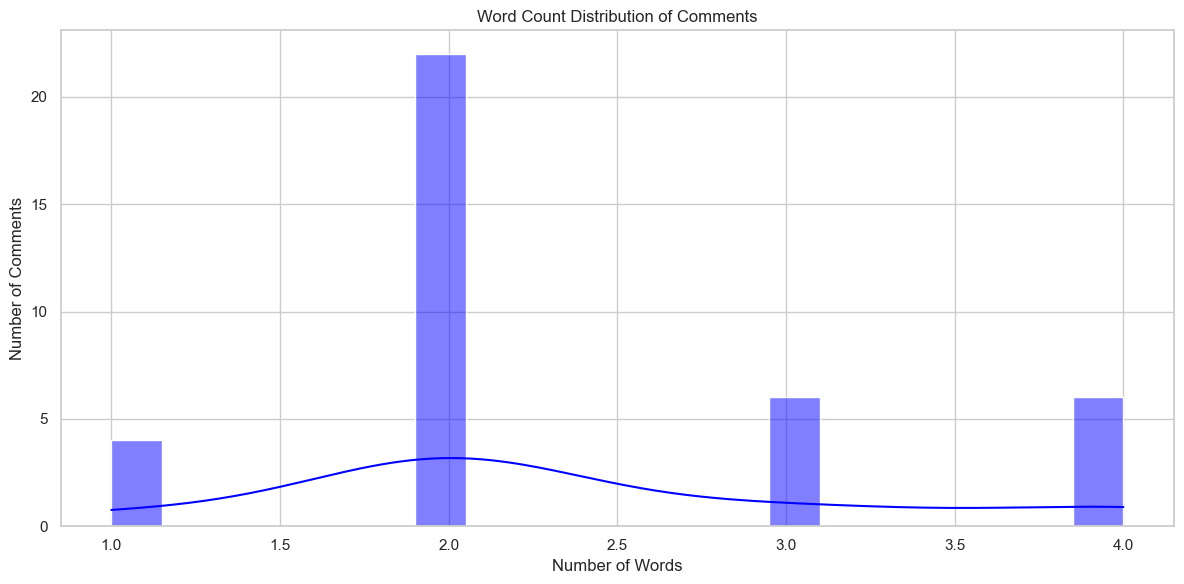

In [17]:
text_col='topics'

# plot the distribution of words
plot_distribution_of_words(df_topics_3, text_col)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 38/38 [00:12<00:00,  3.07it/s]


Using PCA to transformed embeddings


 12%|████████████████████████▊                                                                                                                                                                                  | 6/49 [00:00<00:00, 58.49it/s]


The product of size_min and n_clusters cannot exceed the number of samples.
Terminating the calculation...
The optimum kappa based on Penalized Silhouette score is: 7


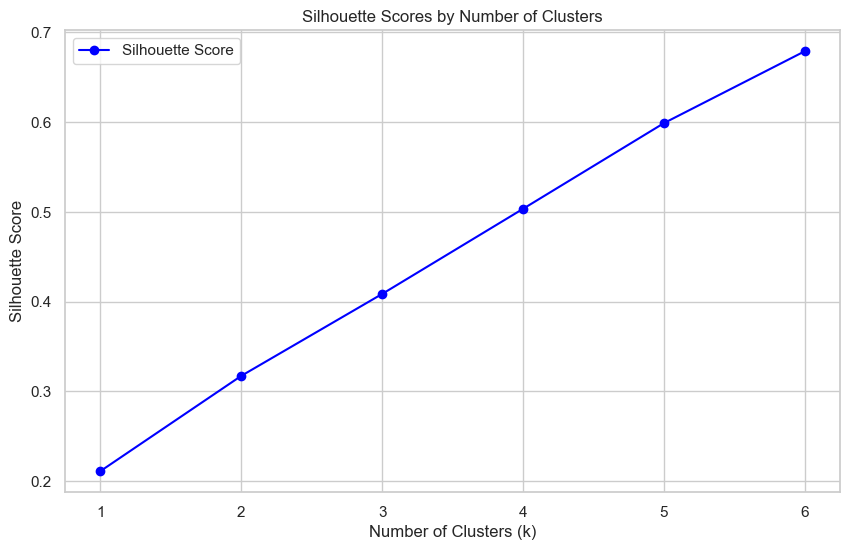

Silhouette score for best kappa: 0.721


In [18]:
from summarization_methods.topic_extraction_clustering_and_summarization import calc_clusters_with_kmeans

# calculate the optimun kappa with KMeans via Silhouette score and using OPENAI embeddings ADA-002
df_topics_3, kmeans_results_2 = calc_clusters_with_kmeans(df=df_topics_3, text_col=text_col, max_token_length=4000, is_pca=(True, 16))

In [19]:
# rename the columns and merge the proper
df_sum_3 = df_sum_3.reset_index().rename(columns={'index': 'comment_id'})
df_topics_3 = df_topics_3.rename(columns={'comment': 'comment_id'})

df_topics_3 = df_topics_3.merge(df_sum_3[['content', 'comment_id']], how='inner', on='comment_id')

grouped_comments_3 = df_topics_3.groupby('labels').agg(
    comments=('content', lambda x: list(x)),
    topics=('topics', lambda x: set(x)),
    comments_count=('comment_id', lambda x: len(list(x)))
    )

grouped_comments_3 = grouped_comments_3.reset_index()

In [20]:
from utils.load_prompts import load_chosen_prompt

# load the prompt template for summarizing comments grouped by label
prompt_template_4 = load_chosen_prompt(prompt_name='prompt_for_summarizing_multiple_comments')

The number of arguments to contain in the prompt are: 4
The required arguments are: ['language', 'topic', 'previous_summaries', 'comments']


In [21]:
from summarization_methods.topic_extraction_clustering_and_summarization import summarize_comments_by_cluster

text_col='comments'
language = 'English'
topic = df_topics.iloc[0].topic

# produce the summaries for grouped comments by label
summaries_4 =summarize_comments_by_cluster(df=grouped_comments_3, text_col=text_col, prompt_name=prompt_template_4, gpt_model='gpt-4o', language=language, topic=topic)
print('-----------------------------------------------------------------------------------------------------------------------------------------------------')
# load the prompt template for the final summary
prompt_template_final_4 = load_chosen_prompt(prompt_name='final_prompt_for_summarizing_multiple_summaries')

Summary for cluster label: 0
The comments on the presentation of market trends emphasize several key areas. First, there is a focus on the need for clear and concise visuals to enhance understanding, with multiple commenters suggesting improvements in charts and graphs. Second, participants highlighted emerging trends in technology, particularly the rise of AI and machine learning, and their impact on market dynamics. Additionally, there is a call for more detailed analysis on consumer behavior changes post-pandemic. Some commenters also pointed out the necessity of including case studies for a practical application of the presented theories. Lastly, there were mentions of incorporating more regional market data for a comprehensive global perspective. Overall, the feedback underscores the importance of clarity, detailed analysis, and practical examples in effectively conveying market trends.
-------------------------------------------------------------------------------------
Summary f

In [22]:
from summarization_methods.topic_extraction_clustering_and_summarization import final_summary_of_clustered_comments

# produce the final summary for the 4th technique
final_summary_4 = final_summary_of_clustered_comments(prompt=prompt_template_final_4, gpt_model='gpt-4o', topic=topic, summaries=summaries_4)

The feedback on the presentation of market trends consistently emphasizes several critical themes. There is a strong need for clear and concise visuals, including improved charts and graphs, to enhance understanding. Participants agree on the importance of maintaining a logical flow and coherence, with refined transitions between sections to ensure a seamless presentation. There is a repeated call for current and comprehensive data, updated frequently to reflect the latest market conditions. The practicality of the information is crucial, exemplified by the incorporation of more case studies and real-life examples.

Simplifying complex information to broaden accessibility is highlighted, as is the inclusion of more regional market data to provide a holistic global perspective. A thorough examination of geopolitical influences on market trends is necessary, given their significance in global dynamics.

Additionally, there is a strong push for interactive elements to engage the audience 

### STORE THE FINAL SUMMARIES IN A CSV

In [23]:
# find the original summary
df_specific_summaries_list = pd.DataFrame(data['specific_query_list'])
print(df_specific_summaries_list.columns)
print('-----------------------------------------------------------------------------------')
print(df_specific_summaries_list)

Index(['query', 'answer', 'relevant_text_span'], dtype='object')
-----------------------------------------------------------------------------------
                                               query  \
0       Summarize the presentation on market trends.   
1  What did Marketing think of technology innovat...   
2  Why did Marketing propose lemon or lime when p...   
3  Summarize the decision discussion about remote...   
4  Why did the group decide not to go for an LCD ...   

                                              answer relevant_text_span  
0  Marketing presented on market trends and sugge...          [[0, 91]]  
1  Marketing mentioned that market research empha...         [[58, 71]]  
2  Because Marketing recommended the group took s...         [[77, 87]]  
3  The group discussed the final remote concepts ...       [[316, 639]]  
4  When discussing the LCD functionality, the gro...       [[395, 431]]  


In [24]:
final_summaries = {
    'original_summary': df_specific_summaries_list.loc[0, 'answer'], 
    'random_grouping_summarization': final_summary_1,
    'label_based_summarization': final_summary_2,
    'cluster_based_summarization': final_summary_3,
    'topic_extraction_cluster_based_summarization': final_summary_4
}

# Convert dictionary to DataFrame, with the keys as 'technique' and values as 'summary'
final_summaries_df = pd.DataFrame.from_dict(final_summaries, orient='index', columns=['summary']).reset_index()
final_summaries_df.rename(columns={'index': 'technique'}, inplace=True)

final_summaries_df.to_csv('outputs/final_summaries_1.csv', index=False)

In [25]:
final_summaries_df

,technique,summary
0,original_summary,Marketing presented on market trends and sugge...
1,random_grouping_summarization,The discussion on market trends centers on int...
2,label_based_summarization,The discussion on the presentation of market t...
3,cluster_based_summarization,The discussion on the presentation of market t...
4,topic_extraction_cluster_based_summarization,The feedback on the presentation of market tre...


In [26]:
import pandas as pd

final_summaries_df = pd.read_csv('outputs/final_summaries.csv')

### BENCMARKING BASED ON THE EXTRACTED SUMMARIES OF THE THREE (3) TECHNIQUES

The evaluation will become by using these metrics: ROUGE score, BLEU score and BERTScore

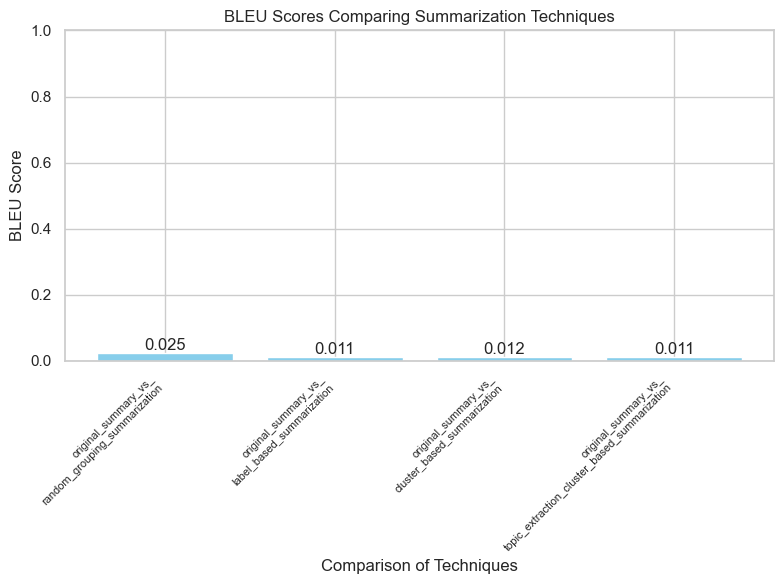

In [27]:
from utils.benchmark_summaries import calc_and_plot_bleu_scores

bleu_scores = calc_and_plot_bleu_scores(summaries_df=final_summaries_df,
                                        text_col='summary', title_col='technique')

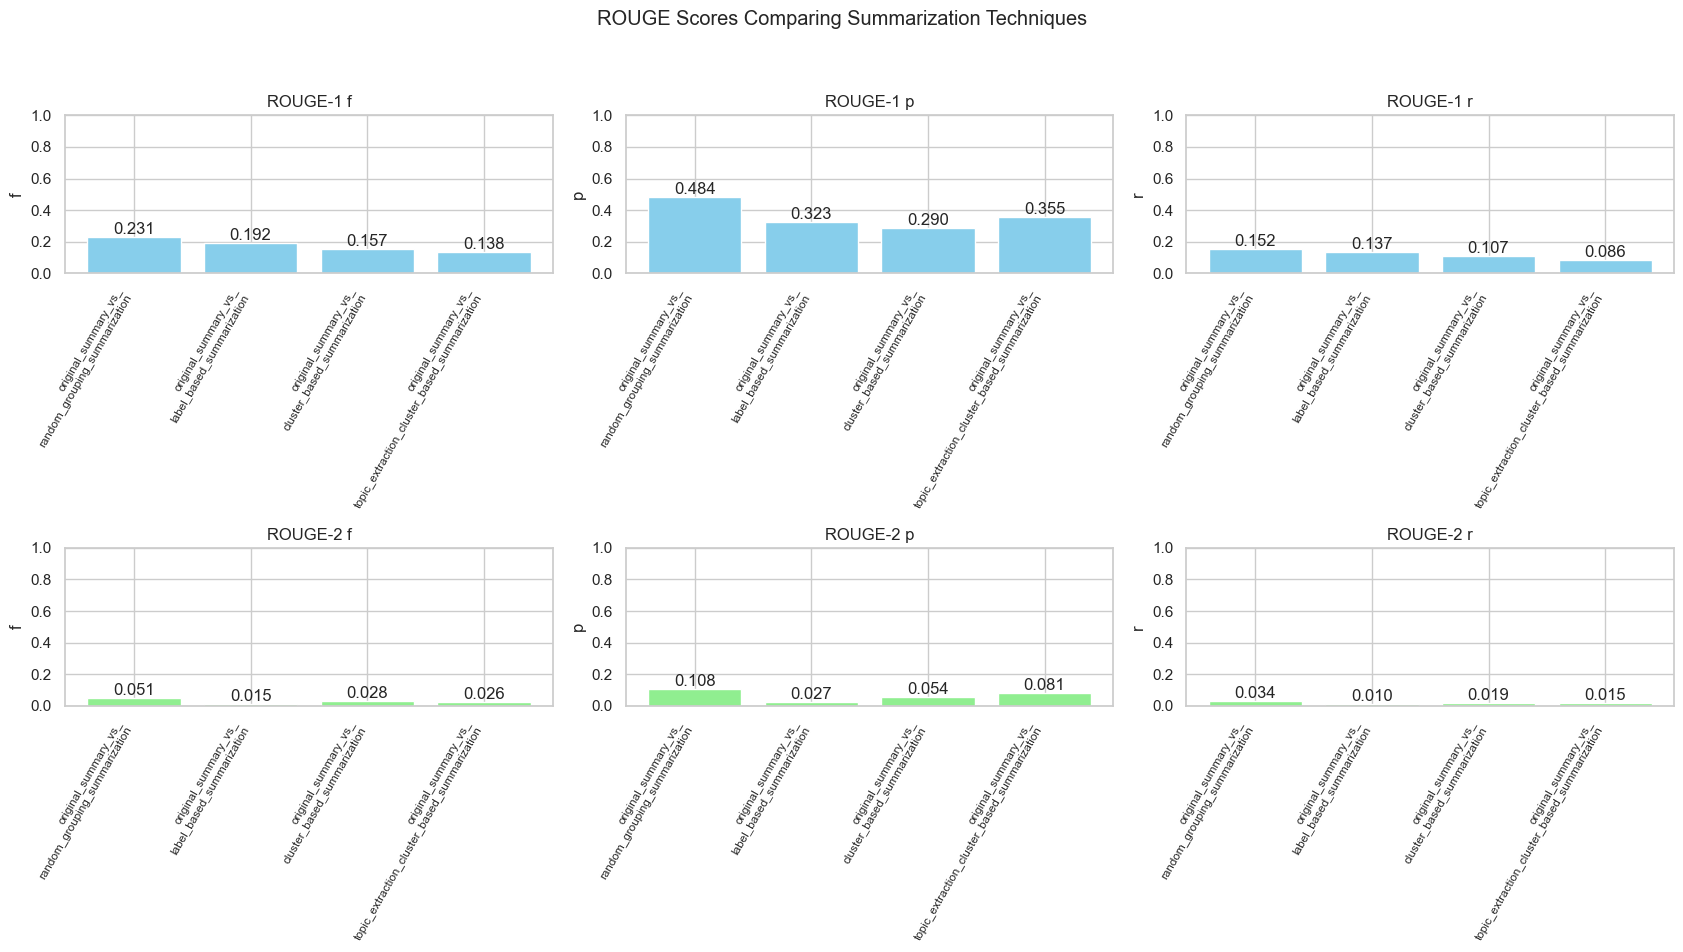

In [28]:
from utils.benchmark_summaries import calc_and_plot_rouge_scores

rouge_scores = calc_and_plot_rouge_scores(summaries_df=final_summaries_df,
                                        text_col='summary', title_col='technique')

C:\1. Python\LLM_mods_Topic_Modelling\venv\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
C:\1. Python\LLM_mods_Topic_Modelling\venv\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


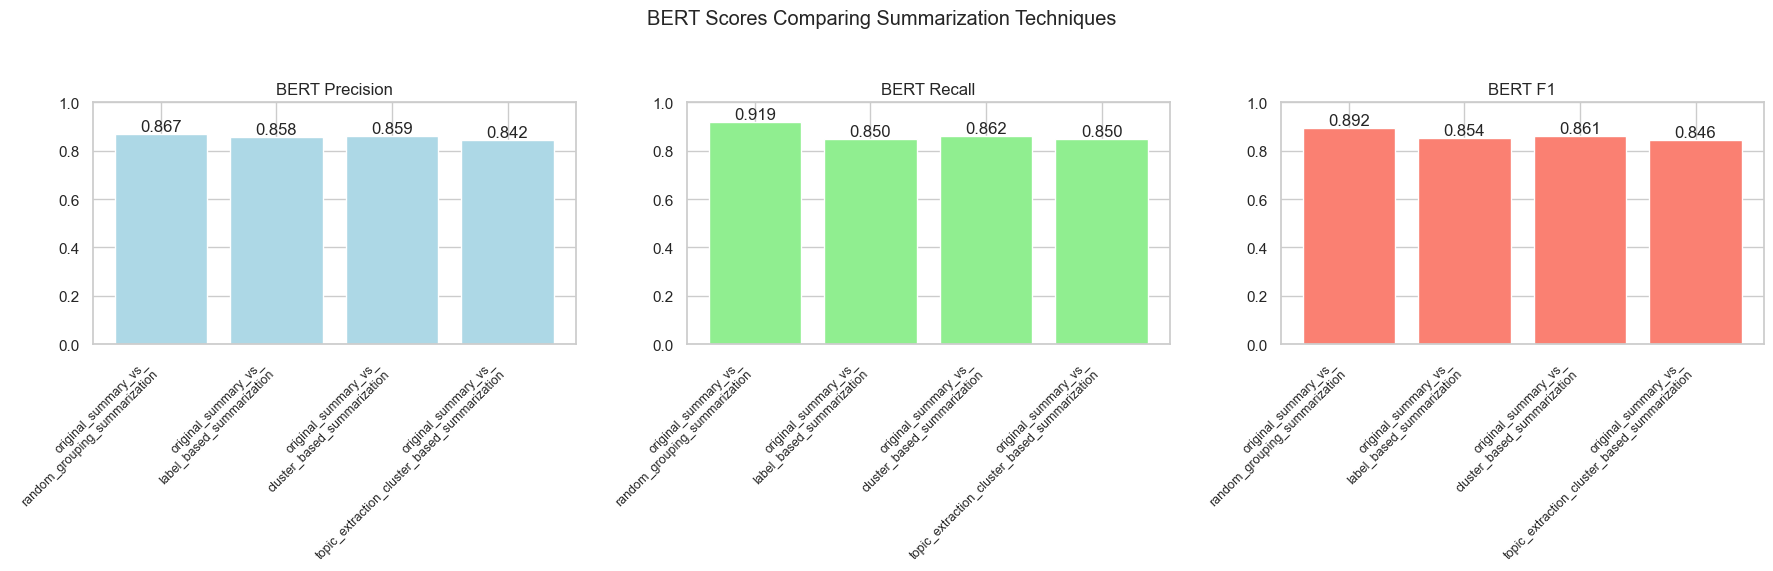

In [29]:
from utils.benchmark_summaries import calc_and_plot_bert_scores

bert_scores = calc_and_plot_bert_scores(summaries_df=final_summaries_df,
                                        text_col='summary',
                                        title_col='technique',
                                        model_to_use='princeton-nlp/sup-simcse-roberta-large',
                                        text_lang='en')